In [1]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/muhammadanas0716/Machine-Learning-Projects-101/main/Heart%20Disease%20Classification/heart-disease.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

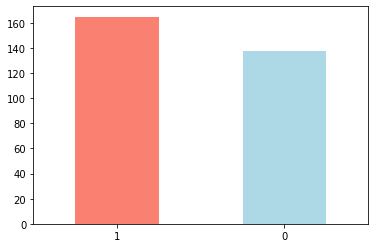

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=360)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


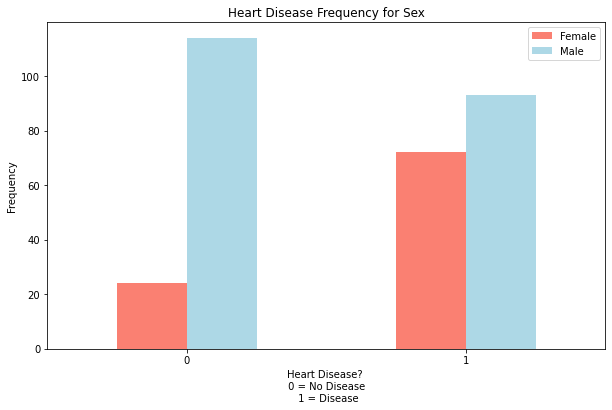

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

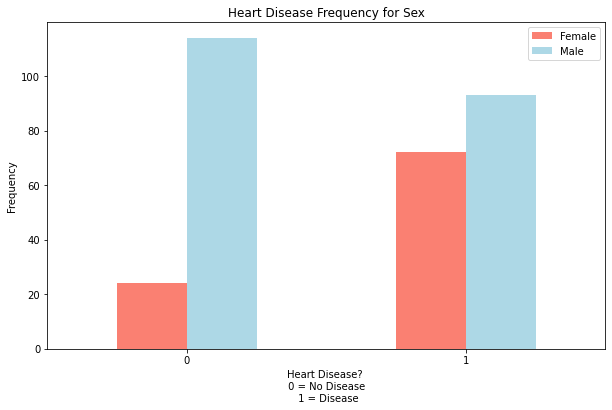

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

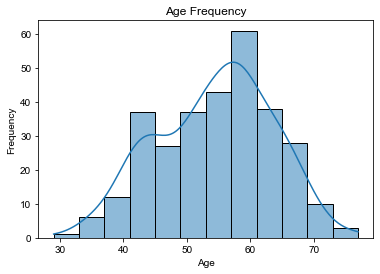

In [14]:
sns.histplot(df["age"], kde=True)
plt.style.use("seaborn-darkgrid")


# Customize the plot
plt.title("Age Frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


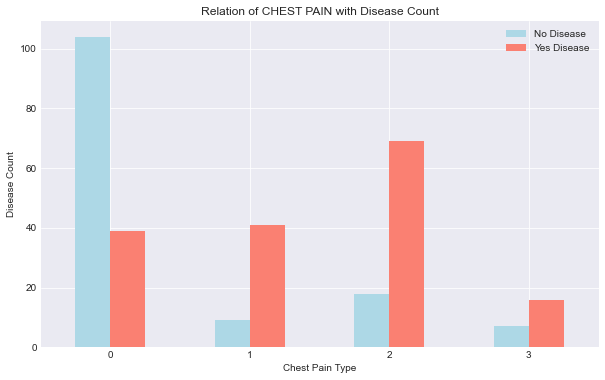

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])

# Customization
plt.title("Relation of CHEST PAIN with Disease Count")
plt.xlabel("Chest Pain Type")
plt.ylabel("Disease Count")
plt.xticks(rotation=360)
plt.legend(["No Disease", "Yes Disease"])
plt.show()

In [17]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


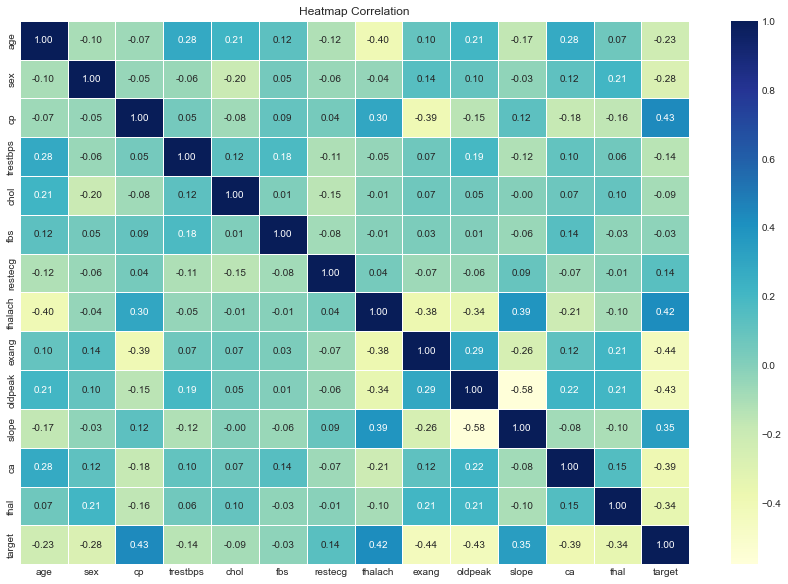

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [23]:
pd.DataFrame(y).head(3)

,target
0,1
1,1
2,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
pd.DataFrame(y_train)


,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [27]:
len(X_train), len(y_train)


(242, 242)

In [28]:
len(X_test), len(y_test)


(61, 61)

In [29]:
models = {
        "Logistic Regression" : LogisticRegression(max_iter=10000),
        "KNN" : KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()
         }

# Create a function to train & score the data
def fit_and_score(models, X, y, X_train, X_test, y_train, y_test, random_seed=42):
    global model_accuracy, model_cross_validation
    """
    Fits & Scores given machine learning models
    
    ** Parameters **
    models: Model Dictionary
    X: The X Dataset Split (NO labels)
    y: The y Dataset Split (LABELS)
    X_train: Training Data (no labels)
    X_test: Test Data (no labels)
    y_train: Training Data Labels
    y_test: Test Data Labels
    random_seed: Random Seed (default 42)
    """
    
    # Random Seed
    np.random.seed(random_seed)
    
    # Create a dictionary to keep model scores
    model_accuracy = {}
    model_cross_validation = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Append the score to the model score dictionary
        model_accuracy[name] = model.score(X_test, y_test)
        
        # Append the mean of the cross-validation scores to dictionary
        cvs = cross_val_score(model, X, y, cv=5)
        model_cross_validation[name] = np.mean(cvs)
    
    return model_accuracy, model_cross_validation

In [30]:
fit_and_score(models, X, y, X_train, X_test, y_train, y_test)

({'Logistic Regression': 0.8688524590163934,
  'KNN': 0.6885245901639344,
  'Random Forest': 0.8360655737704918},
 {'Logistic Regression': 0.8282513661202187,
  'KNN': 0.643879781420765,
  'Random Forest': 0.8214754098360656})

In [31]:
accuracy_scores = pd.DataFrame(model_accuracy, index=["Accuracy"])
cross_val_scores = pd.DataFrame(model_cross_validation, index=["Cross Validated Scores"])

In [32]:
accuracy_scores

,Logistic Regression,KNN,Random Forest
Accuracy,0.868852,0.688525,0.836066


In [33]:
cross_val_scores

,Logistic Regression,KNN,Random Forest
Cross Validated Scores,0.828251,0.64388,0.821475


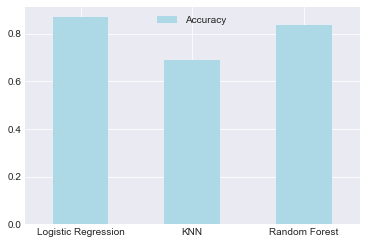

In [34]:
accuracy_scores.T.plot.bar(figsize=(6, 4), color=["Lightblue"])
plt.xticks(rotation=360)
plt.show()

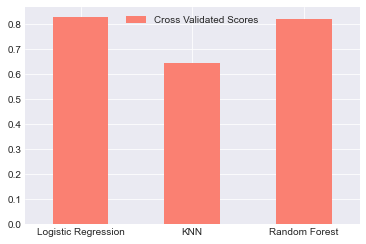

In [35]:
cross_val_scores.T.plot.bar(figsize=(6, 4), color=["Salmon"])
plt.xticks(rotation=360)
plt.show()

In [36]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

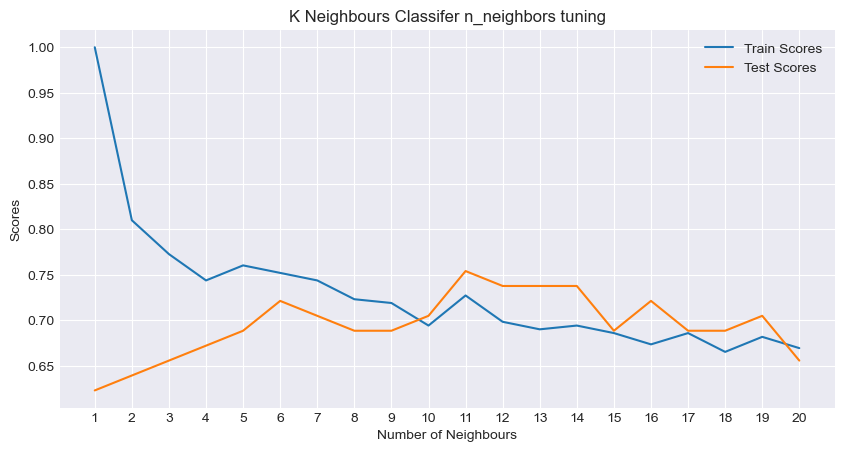

Max KNN score on train data: 100.00%
Max KNN score on test data: 75.41%


In [39]:
plt.style.use("seaborn-darkgrid")

# Create Figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Plot the Neighbours and their respective scores
ax.plot(neighbours, train_scores, label = "Train Scores")
ax.plot(neighbours, test_scores, label = "Test Scores")

# Some customizations
plt.title("K Neighbours Classifer n_neighbors tuning")
plt.xlabel("Number of Neighbours")
plt.ylabel("Scores")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

# Info
print(f"Max KNN score on train data: {max(train_scores)*100:.2f}%")
print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")

In [40]:
logistic_regression_grid = {"C" : np.logspace(-4, 4, 20),
                           "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                           "penalty" : ["none", "11", "l2"]
                           }

# Create hyperparameter grid for RandomForestClassifier
random_forest_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10], 
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [41]:
np.random.seed(42)

# Setup random hyperparamter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(solver='lbfgs', max_iter=100),
                               param_distributions=logistic_regression_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=False)

# Fit random hyperamater model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs fa

C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with t

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['none', '11', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=False)

In [42]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 4.281332398719396}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [44]:
np.random.seed(42)

# Setup random hyperparamter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_forest_grid,
                          cv = 5,
                          n_iter = 10,
                          verbose=True)

# Fit random hyperamater model for Random Forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [46]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [47]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
grid_search_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
grid_search_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [48]:
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
grid_search_log_reg.score(X_test, y_test)

0.8852459016393442

In [50]:
y_preds = grid_search_log_reg.predict(X_test)

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\a4abh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


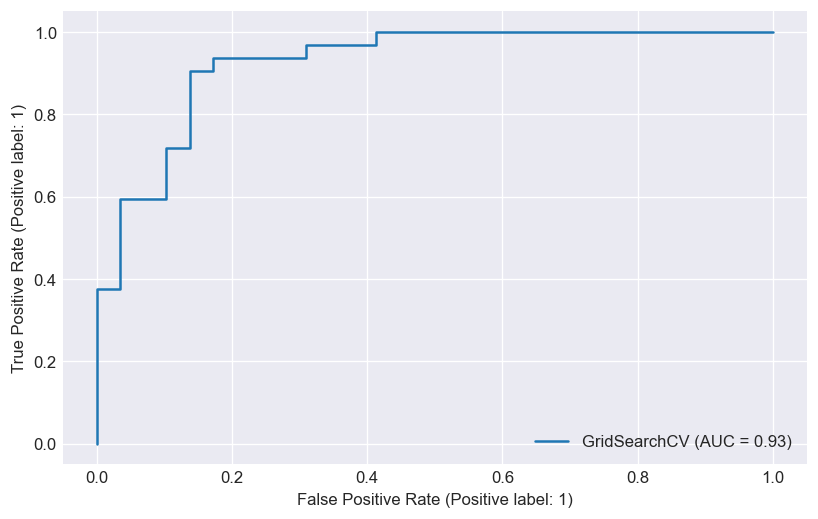

In [52]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
plot_roc_curve(grid_search_log_reg, X_test, y_test, ax=ax)
plt.show()

In [53]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


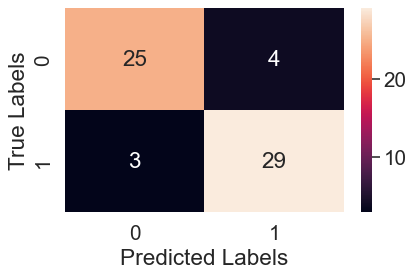

In [54]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap
    """
    
    fig, ax = plt.subplots(figsize = (5, 3), dpi=90)
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
plot_conf_matrix(y_test, y_preds) 

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
grid_search_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
# Create a new classifier with these paramters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [58]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [60]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [62]:
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F-1 Score" : cv_f1
}, index=["Cross-Validated Scores"])
cv_metrics

,Accuracy,Precision,Recall,F-1 Score
Cross-Validated Scores,0.844699,0.820794,0.921212,0.867301


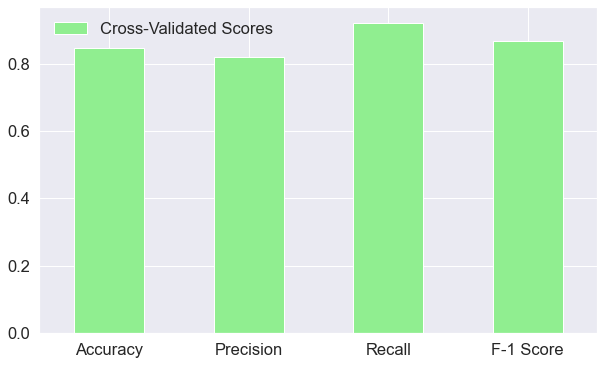

In [63]:
cv_metrics.T.plot.bar(figsize=(10, 6), color="lightgreen")
plt.xticks(rotation = 360)
plt.show()

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
clf = LogisticRegression(C= 0.20433597178569418, solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [66]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [67]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

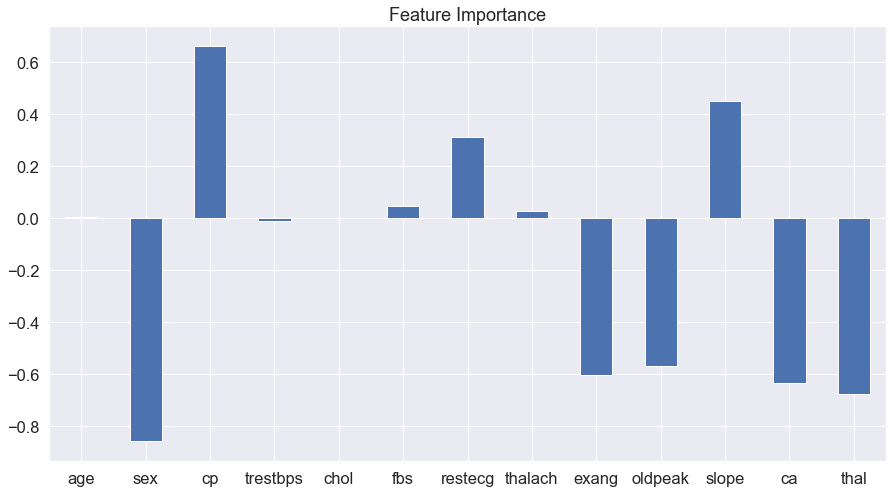

In [68]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(15, 8))
plt.xticks(rotation = 360)
plt.show()


In [69]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [1]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()